In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load Data
data = pd.read_csv("data/WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# drop ID
data.drop(["Id"],axis=1,inplace=True)
#  PCA assumes numerical features with no missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Data Preprocessing
X = data.drop("quality",axis=1)
y = data['quality']

# standardized features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA, fit & transform the data
pca = PCA().fit(X_scaled) # computes cov matrix
pca_res = pca.transform(X_scaled) # projects standardize data onto PC, is a new feature matrix

# 
pca_res_df = pd.DataFrame(pca_res,columns = [f"PC{i}" for i in range(1, pca_res.shape[1]+1)])
pca_res_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,0.046465
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,0.998623,-0.746939,0.547644,0.005196,-0.134810
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,0.536162,-0.575652,0.084118,-0.203715,-0.122553
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,-0.300410,0.494589,-0.110087,-0.121798,0.313678
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,0.046465


# Matplotlib Visualization

## PCA Plot #1: Explained Variance Plot

Explained variance by each component: [0.28692345 0.17075104 0.14305928 0.1101368  0.08711032 0.06048811
 0.05069067 0.03809625 0.03131763 0.01611195 0.0053145 ]
Total explained variance: 1.00


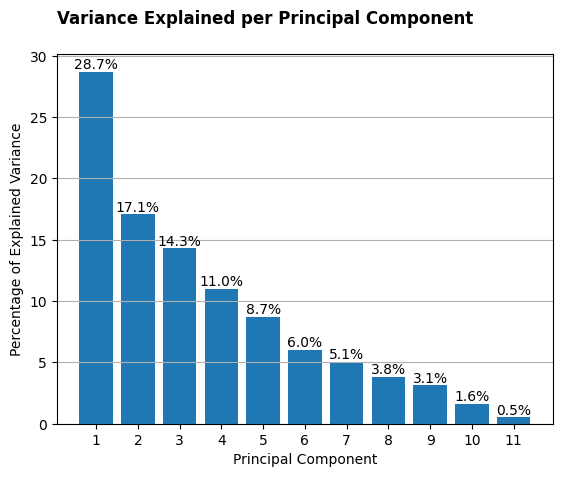

In [ ]:
# Qs: How much of the total variance in the data is captured by each PC?

import matplotlib.pyplot as plt
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_var}")
print(f"Total explained variance: {np.sum(explained_var):.2f}")

plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1,len(plot_y)+1)

bars = plt.bar(plot_x,plot_y,align="center",linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+0.001,f"{yval:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

# 28.7% of total variance is explained by PC1.

## PCA Plot #2: Cumulative Explained Variance Plot


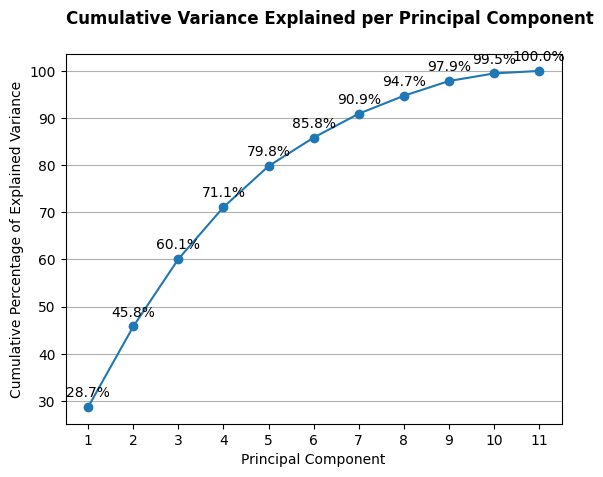

In [ ]:
# Qs: How should I reduce the dimensionality of the data 
# but still keep at least 90% of the variance?

exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y = [sum(exp_var[:i+1]) for i in range (len(exp_var))]
plot_x = range(1,len(plot_y)+1)

plt.plot(plot_x,plot_y,marker="o")
for x,y in zip(plot_x,plot_y):
    plt.text(x,y+1.5,f"{y:.1f}%", ha="center",va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Percentage of Explained Variance")
plt.title("Cumulative Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold"}, y=1.06)

plt.grid(axis="y")
plt.xticks(plot_x)

plt.show()

# To capture at least 90% of the variance, still need to keep the first 7 PC.

## PCA Plot #3: 2D/3D Component Scatter Plot

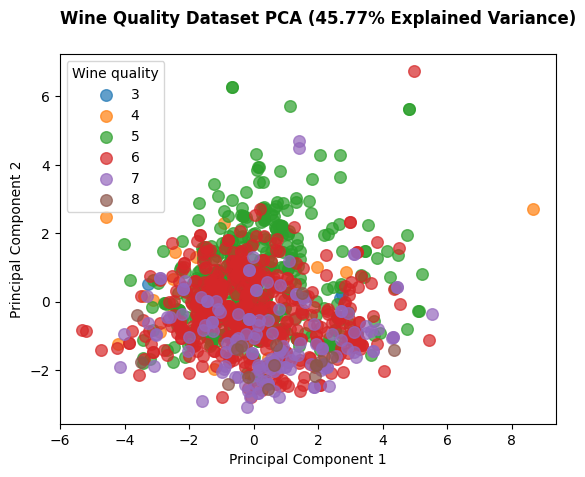

In [ ]:
# How to visualize the relationship between records of a high-dimensional dataset?

total_exp_var = sum(pca.explained_variance_ratio_[:2]) * 100

pca_2d_df = pd.DataFrame(pca_res[:,:2],columns=["PC1","PC2"])
pca_2d_df["y"] = data["quality"]

pca_2d_df.head()

fig, ax = plt.subplots()
for i,target in enumerate(sorted(pca_2d_df["y"].unique())): # find all unique wine quality values
    subset = pca_2d_df[pca_2d_df["y"] == target] # filter data pts belongs to one wine quality class
    ax.scatter(x=subset["PC1"],y=subset["PC2"], s=70, alpha=0.7, label = target)


plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ({total_exp_var:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()

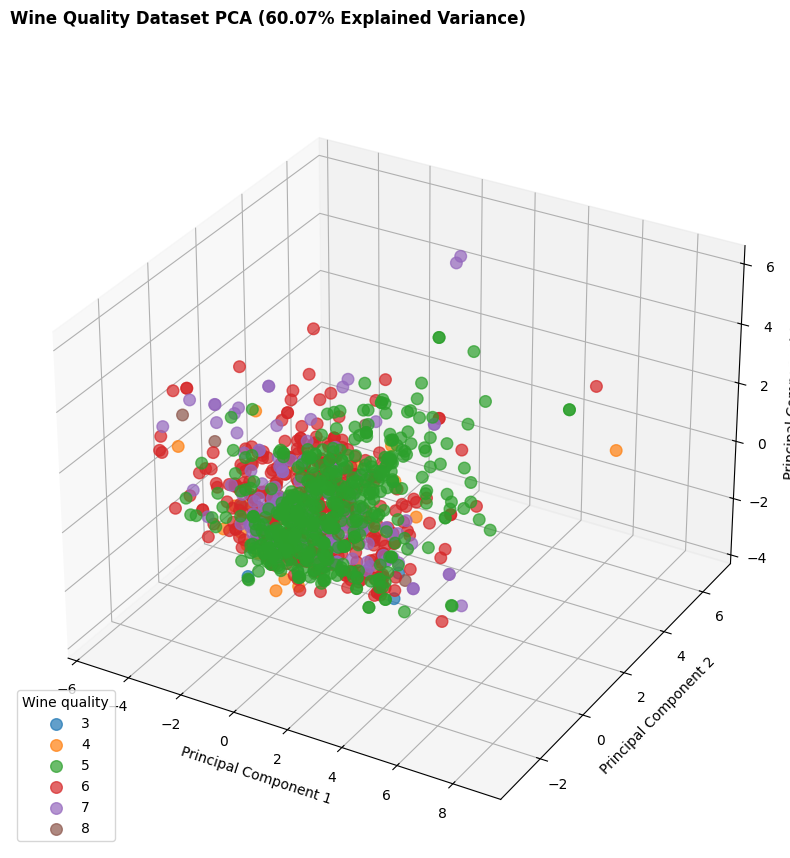

In [ ]:
# Add one more dimension

total_exp_var = sum(pca.explained_variance_ratio_[:3]) * 100

pca_3d_df = pd.DataFrame(pca_res[:,:3],columns=["PC1","PC2","PC3"])
pca_3d_df["y"] = data["quality"]

pca_2d_df.head()

fig = plt.figure(figsize = (10,10)) # create an empty figure container 
ax = fig.add_subplot(projection="3d") # add 3D Axes object 
# ax.view_init(elev=0, azim=0)
for i,target in enumerate(sorted(pca_3d_df["y"].unique())): 
    subset = pca_3d_df[pca_2d_df["y"] == target] 
    ax.scatter(xs=subset["PC1"],ys=subset["PC2"],zs=subset["PC3"], s=70, alpha=0.7, label = target)


ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"Wine Quality Dataset PCA ({total_exp_var:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality", loc="lower left")
plt.show()

## PCA Plot #4: Biplot

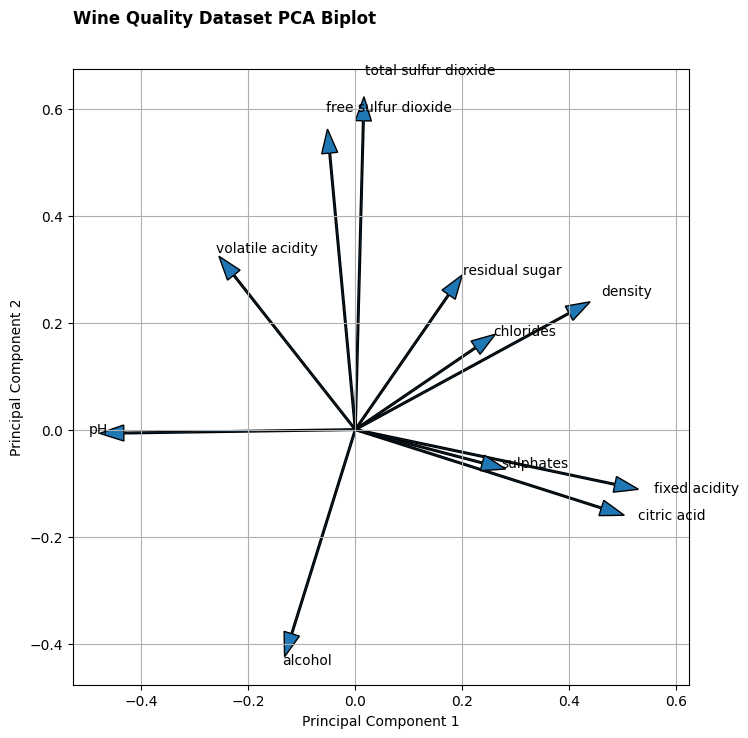

In [ ]:
# Qs: How to visualize how the original variables contribute to 
# and correlate with the PC?

labels = X.columns # original ferature names
n = len(labels)
coeff = np.transpose(pca.components_)
#  (n_components, n_features)
# each row = a PC, each col = loading (weight of a feature in that PC)
# After transpose: coeff[i,0] = loading of a feature i on PC1

pc1 = pca.components_[:,0]
pc2 = pca.components_[:,1]

plt.figure(figsize=(8,8))

for i in range(n):
    plt.arrow(x=0,y=0,dx=coeff[i,0],dy=coeff[i,1],width=0.003,head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i])

# draw an arrow from origin to (PC1 loading, PC2 loading) for feature i
# arrow direction = relationship with PCs (same dir=positively correlated)
# arrow length = strength of contribution
# angle between arrows = correlation btw features (90 degree=uncorr)

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid()
plt.show()

# sulphates, fixed acidity, citric acid have high correlation

## PCA Plot #5: Loading Score Plot

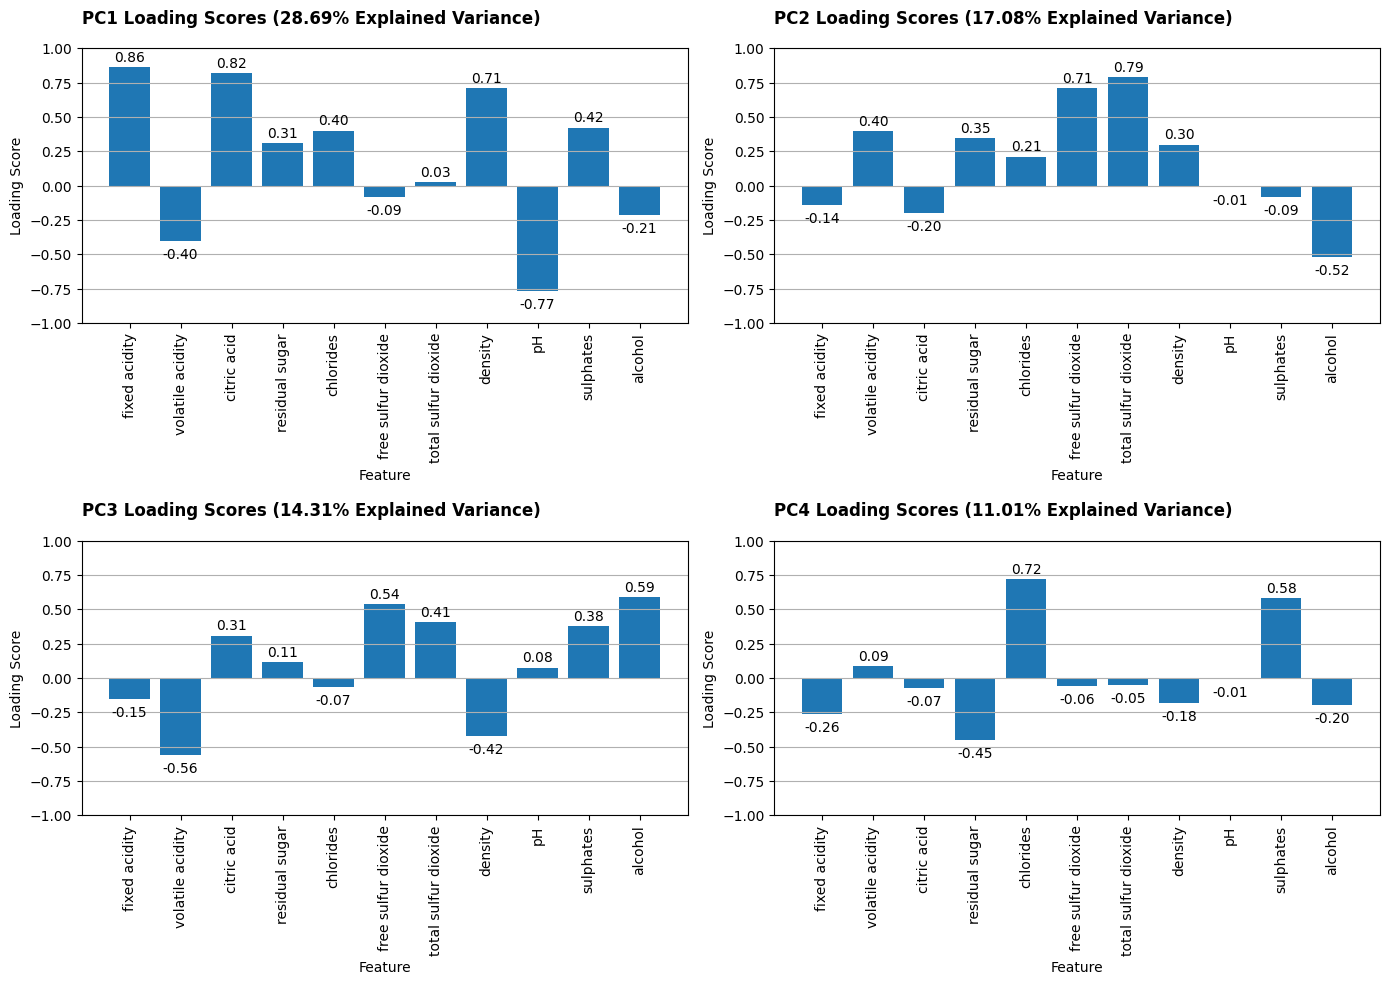

In [ ]:
# Qs: Which variables from the original dataset have the most influence on each PC?
# loading score = weight of an original var to a given PC
# higher abs value = higher influence

loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_),
    columns = [f"PC{i}" for i in range(1, len(X.columns) +1)],
    index = X.columns
)

# pca.exp_var = eigenvalues (var captured by each PC)
# np.sqrt it = scale eigenvectors by the s.d. of each PC
# loading of ij = eigenvector of ij x sqrt(eigenvalue of j)
# produces true loadings = reflect corr strength btw featue i and PC j
# loadings aprrox correlation when data is standardized

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i,ax in enumerate(axs.flatten()): # loop one PC per subplot
    exp_var = pca.explained_variance_ratio_[i]*100
    pc = f"PC{i+1}"
    bars = ax.bar(loadings.index,loadings[pc])
    
    ax.set_title(f"{pc} Loading Scores ({exp_var:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Loading Score")
    ax.grid(axis="y")
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylim(-1, 1)

    for bar in bars:
        yval = bar.get_height()
        offset = yval + 0.02 if yval > 0 else yval - 0.15
        ax.text(bar.get_x() + bar.get_width() / 2, offset, f"{yval:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# PC1 accounts for ~29% of the variability
# and fixed acidity feature has high loading score 
# is an imporant feature and should be kept